In [1]:
import numpy as np

from mygeopackage import data_loader, vegetation_indices as vi, stack_operations
from mygeopackage.data_structures import BandName

In [2]:
DATA_FOLDER = '../data/example_images/'
EXPORT_FOLDER = './processed_data_refactored/'

In [16]:
# Scan the data folder for images
scan_results = data_loader.ImageScanner(DATA_FOLDER).scan()
scan_results.head(5)

month band                                      file_path
0      1  B02  ..\data\example_images\1\month_1_band_B02.tif
1      1  B03  ..\data\example_images\1\month_1_band_B03.tif
2      1  B04  ..\data\example_images\1\month_1_band_B04.tif
3      1  B08  ..\data\example_images\1\month_1_band_B08.tif
4      2  B02  ..\data\example_images\2\month_2_band_B02.tif

In [15]:
# Create a stack of the images with data from the selected months
month_stack = data_loader.stack_months(scan_results, target_months = [7,8,9,10])

In [5]:
month_stack.get_available_bands()

['B02', 'B03', 'B04', 'B08']

In [17]:
month_stack.get_band_stack('B02').shape

(4, 512, 512)

In [6]:
# Add some vegetation indices to the stack
vi.add_nvdi(month_stack)
vi.add_evi(month_stack)

In [7]:
month_stack.get_available_bands()

['B02', 'B03', 'B04', 'B08', 'NDVI', 'EVI']

In [9]:
# Create some reduced stacks
reduced_stack_mean = stack_operations.apply_reduction(month_stack, np.nanmean, axis=0)
reduced_stack_max = stack_operations.apply_reduction(month_stack, np.nanmax, axis=0)

In [10]:
reduced_stack_mean.get_band_stack('NDVI').shape

(1, 512, 512)

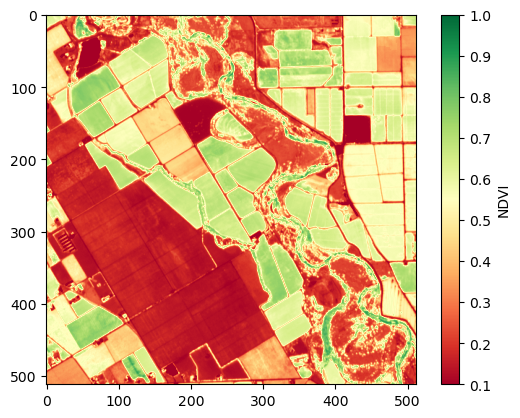

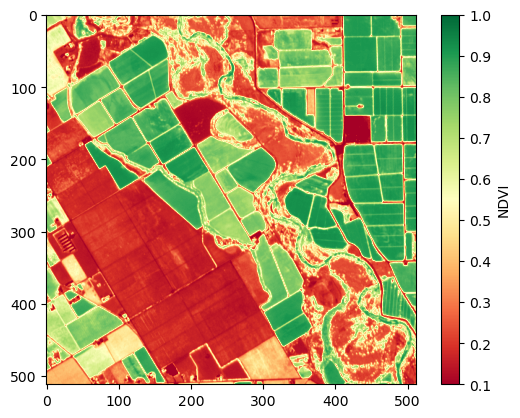

In [11]:
# Single-band plots
stack_operations.plot_stack(reduced_stack_mean, 'NDVI', cmap='RdYlGn', vmin=0.1, vmax=1)
stack_operations.plot_stack(reduced_stack_max, 'NDVI', cmap='RdYlGn', vmin=0.1, vmax=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


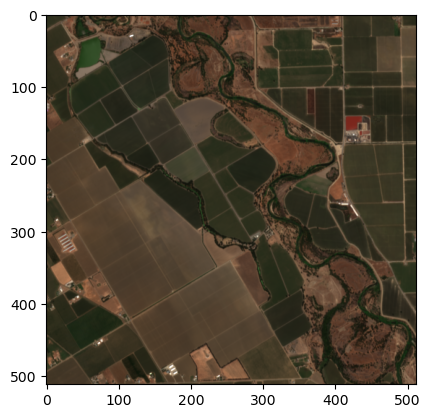

In [12]:
# True-color plot
stack_operations.plot_stack(reduced_stack_mean, [BandName.RED.value, BandName.GREEN.value, BandName.BLUE.value])

In [13]:
# Exporting to GeoTiff
export_bands = ['NDVI', 'EVI']
for band in export_bands:
    reduced_stack_mean.export_band(band=band, file_path=EXPORT_FOLDER + f'{band}_mean.tif')
    
for band in export_bands:
    reduced_stack_max.export_band(band=band, file_path=EXPORT_FOLDER + f'{band}_max.tif')